<a href="https://colab.research.google.com/github/datrz/its.damian/blob/main/Assignment_cnn_Best_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - CNNs

In this assignment from Applied Machine Learning course, we needed to use convolutional neural networks to predict values in a classification problem with ten classes. The images have shape 96x96 and are in color.

When I was done, I needed to submit the results on the Kaggle webpage for the in class competition. I could submit 5 times every day, so you can experiment with different infrastructures.

# Kaggle

The assignment used Kaggle. We could use it to submit the predictions. It  then gave a score (based on **some** of the test data).

# Result

I ended up winning this competition among 15 other teams in class, ending up with accuracy of 0.57599 on Test data.

# Model structure
Import data from google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
# Load data (must be in same folder as this file, which it will be if you simply unzip the assignment).
# Note that we don't have any y_test! This way you cannot "cheat"!
x_train = np.load('/content/drive/MyDrive/ColabNotebooks/APPLIED MACHINE LEARNING/Assignment8/x_train.npy')
x_test = np.load('/content/drive/MyDrive/ColabNotebooks/APPLIED MACHINE LEARNING/Assignment8/x_test.npy')
y_train = np.load('/content/drive/MyDrive/ColabNotebooks/APPLIED MACHINE LEARNING/Assignment8/y_train.npy')

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape, x_test.shape, y_train.shape)

(2000, 96, 96, 3) (1000, 96, 96, 3) (2000,)


Preview of images

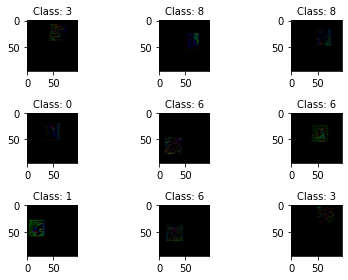

In [35]:
for i in range(9):
	# define subplot
  plt.subplot(3,3,i+1)
  
  plt.title("Class: "+str(y_train[i]), fontsize = '10')

	# plot raw pixel data
  plt.tight_layout()
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.show()

# CNN
Training the network on provided training set

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
#    tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
# best performing model until now    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='LeakyReLU'),
    tf.keras.layers.Dense(256, activation='LeakyReLU'),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
    )
model.summary()
model.fit(x_train, y_train, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training the model on data generated by ImageDataGenerator with either horizontal flip or vertical flip, and then different shifts.

In [ ]:
for i in [True,False]:
  for j in [0.5,0.4,0.3,0.2]:
    datagen = ImageDataGenerator(
        horizontal_flip=i,
        vertical_flip=(not i),
  #      width_shift_range=j,
        height_shift_range=j,
        validation_split=0.2
        )

    datagen.fit(x_train)
    
    model.fit(datagen.flow(x_train, y_train, batch_size=32, subset='training'), epochs=40)

for i in [True,False]:
  for j in [0.5,0.4,0.3,0.2]:
    datagen = ImageDataGenerator(
        horizontal_flip=i,
        vertical_flip=(not i),
        width_shift_range=j,
  #      height_shift_range=j,
        validation_split=0.2
        )

    datagen.fit(x_train)
    
    model.fit(datagen.flow(x_train, y_train, batch_size=32, subset='training'), epochs=40)    

Training on both horizontal and vertical flips and width/height shifts

In [ ]:
for i in [True,False]:
  for j in [0.5,0.4,0.3,0.2]:
    datagen = ImageDataGenerator(
        horizontal_flip=i,
        vertical_flip=i,
        width_shift_range=j,
        height_shift_range=j,
        validation_split=0.2
        )

    datagen.fit(x_train)
    
    model.fit(datagen.flow(x_train, y_train, batch_size=32, subset='training'), epochs=40)

The below code makes predictions and then saves them (after checking they are in correct format).

It converts to appropriate $\texttt{.csv}$ for Kaggle submit.

In [ ]:
y_test_hat = model.predict(x_test)
y_test_hat_pd = pd.DataFrame({
    'Id': list(range(1000)),
    'Predicted': y_test_hat.argmax(axis=1),
})

32/32 [==============================] - 1s 16ms/step


In [ ]:
# After you make your predictions, you should submit them on the Kaggle webpage for our competition.

# Below is a small check that your output has the right type and shape
assert isinstance(y_test_hat_pd, pd.DataFrame)
assert all(y_test_hat_pd.columns == ['Id', 'Predicted'])
assert len(y_test_hat_pd) == 1000

# If you pass the checks, the file is saved.
y_test_hat_pd.to_csv('y_test_hat.csv', index=False)